In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from tqdm import tqdm

# PCA
from sklearn.decomposition import PCA

from tqdm import tqdm, tqdm_notebook
import os

In [2]:
review_path = '/home/hyejeongeun/Todays_Chatbot/Data/Review/Review_embedding/'

## Load & Preprocessing Data

In [3]:
review_list = os.listdir(review_path)
review_name = [review.split('_embedding')[0] for review in review_list]

In [4]:
#review_df = pd.DataFrame({"review"})
review_df = pd.DataFrame()
for i in tqdm_notebook(range(len(review_list))):
    if review_list[i] == '.ipynb_checkpoints':
        continue
    
    # load data
    df = pd.read_csv(review_path + review_list[i])
    df=df[df['comment_mecab'].notna()]
    
    # df.reset_index(drop=True, inplace=False)
    df = df['comment_mecab'].str.replace(pat='\n', repl='')
    review_df = pd.concat([review_df,df])
    
review_df.reset_index(drop=True, inplace=False)

/home/hyejeongeun/.conda/envs/hyejeongeun/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/146 [00:00<?, ?it/s]

,0
0,진짜 최악 이 하 많 위 가 추천 좀 주 번 화이트 중형 장 구매 오늘 받 설치 중...
1,사진 완전 안 보이 빛 단함 앞 안 앞날 같
2,장 한 세트 줄 알 이 그래서 총 장 오 줄 알 표기 제대로 주 좋 거 같 모든 이...
3,사진 완전 빛 차단 사진 이 꿀 잠 잘 듯 감사
4,해 안 회사 지각 슬프 좋
...,...
710449,서서 물걸레질 힘들 괜찮 거 같
710450,싸 청소 편리 아주 좋
710451,그리 보이 않 걸레 판도 좀 얇 듯 너무 닦 것 같 그렇지만 가격 편 이 괜찮
710452,완존 좋 엄마 드리 싶


In [5]:
review_df[0]

0       진짜 최악 이 하 많 위 가 추천 좀 주 번 화이트 중형 장 구매 오늘 받 설치 중...
1                                사진 완전 안 보이 빛 단함 앞 안 앞날 같
2       장 한 세트 줄 알 이 그래서 총 장 오 줄 알 표기 제대로 주 좋 거 같 모든 이...
3                              사진 완전 빛 차단 사진 이 꿀 잠 잘 듯 감사
4                                          해 안 회사 지각 슬프 좋
                              ...                        
8682                                    서서 물걸레질 힘들 괜찮 거 같
8683                                         싸 청소 편리 아주 좋
8684          그리 보이 않 걸레 판도 좀 얇 듯 너무 닦 것 같 그렇지만 가격 편 이 괜찮
8685                                         완존 좋 엄마 드리 싶
8686                     길 조절 안 쪼금 불편 불편 가격 대비 구성비 굿 가볍 잘
Name: 0, Length: 710454, dtype: object

In [ ]:
# 제일 개수 많은 리뷰 데이터

In [4]:
df = pd.read_csv(review_path + 'review_388715_embedding.csv')
df = df['comment_mecab']

In [8]:
review_df = pd.DataFrame()
review_df = pd.concat([review_df,df])
#review_df = df
review_df

,0
0,제 발주 개 중 개 모두 점 있 화이트 스태프 스툴 일단 목재 자국 있 가격 이 납...
1,아이고 주인 좋 하 정말 다행 감사\n
2,멍멍이 땜 예쁘 놓 못 찌\n
3,유리 고양이 매일 있\n
4,고양이 옹동이 관찰 너무 좋 용도 발견 조립 거 너무 힘들 드릴 있 조립 부분 나사...
...,...
23643,디자인 괜찮 맘 드 잘 쓰\n
23644,일단 교환 귀찮 쓰 다리 높이 다르 삐뚤 물건 수 없 구 냥 진심 장식품\n
23645,살 살 이런 개 쓰레기 구 첨 본드 쓰 조립식 이\n
23646,나사 아무리 안 들어가 헛돈 거 같 최악\n


## LDA

In [10]:
from gensim.models import ldamodel
from gensim.models import CoherenceModel
from time import time
import os
import gensim

In [11]:
temp = 0
mecab_token = []
word_list = []
mecab = review_df[0].tolist()
for line in mecab:
    if type(line)==float:
        temp += 1
    else: 
        l = line.split(' ')
        for word in l:
            if len(word) > 1:
                word_list.append(word)
    mecab_token.append(word_list)
    word_list = []
mecab_token[:5]

[['발주',
  '모두',
  '화이트',
  '스태프',
  '스툴',
  '일단',
  '목재',
  '자국',
  '가격',
  '납득',
  '흰색',
  '많이',
  '사이드',
  '테이블',
  '정말',
  '문제',
  '생각',
  '정말',
  '만들',
  '처음',
  '일단',
  '배송',
  '유리',
  '우리',
  '떨어지',
  '테두리',
  '마감',
  '엉망',
  '만들',
  '긁히',
  '무엇',
  '문제',
  '다리',
  '서로',
  '정말',
  '가구',
  '조립',
  '유리',
  '아예',
  '가지',
  '추후',
  '전화',
  '일부',
  '부속',
  '마음',
  '다시',
  '역시',
  '가능',
  '결국',
  '유리',
  '포기',
  '부분',
  '상단',
  '활용',
  '정말',
  '오늘',
  '상품',
  '구매',
  '이렇게',
  '검수',
  '위험',
  '실망',
  '상품',
  '가격',
  '모두',
  '그러',
  '아예',
  '조립',
  '상품',
  '점검',
  '없이',
  '보내',
  '잘못',
  '생각\n'],
 ['아이고', '주인', '정말', '다행', '감사\n'],
 ['멍멍이', '예쁘', '찌\n'],
 ['유리', '고양이', '매일', '있\n'],
 ['고양이',
  '옹동이',
  '관찰',
  '너무',
  '용도',
  '발견',
  '조립',
  '너무',
  '힘들',
  '드릴',
  '조립',
  '부분',
  '나사',
  '구멍',
  '크기',
  '양쪽',
  '너무',
  '차이',
  '나\n']]

In [14]:
temp # nan값

0

In [16]:
len(mecab_token)

23648

In [17]:
import sys
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm_notebook
from konlpy.tag import Okt; okt = Okt()

import numpy as np
import pandas as pd
import string
import re
import warnings
from gensim import corpora
from gensim import models
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

## 운영체제별 글꼴 세팅

# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

path = './NanumSquareL.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# fm._rebuild()

tokenizer = "nouns" # nouns, morphs, word, predefined

sys_font number: 67
['/usr/share/fonts/truetype/nanumfont/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/ttf-bitstream-vera/VeraBI.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf', '/usr/share/fonts/truetype/nanumfont/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/lyx/msbm10.ttf', '/usr/share/fonts/truetype/lyx/cmsy10.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Italic.ttf', '/usr/share/fonts/truetype/nanumfont/NanumGothic.ttf', '/usr/share/fonts/truetype/nanumfont/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanumfont/NanumBrush.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', '/usr/share/fonts/truety

In [18]:
tokenized_documents = mecab_token

In [19]:
# 문서-단어 행렬 만들기
# 어휘(vocabulary) 학습
dictionary = corpora.Dictionary(tokenized_documents)
# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(document) for document in tokenized_documents]

In [20]:
NUM_TOTAL_WORDS = len(dictionary)
print(dictionary)
print(NUM_TOTAL_WORDS)

Dictionary(5924 unique tokens: ['가격', '가구', '가능', '가지', '검수']...)
5924


In [21]:
# TFIDF 문서-단어 행렬 생성
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0][:5]

[(0, 0.07104896948821623),
 (1, 0.08752134824926705),
 (2, 0.09270806111548308),
 (3, 0.09941041816254276),
 (4, 0.12777905914149995)]

In [22]:
# 토픽 개수와 토픽 별 상위 추출 단어 개수 지정.
NUM_TOPIC_WORDS = 30


def build_doc_term_mat(documents):
    """주어진 문서 집합으로 문서-어휘 행렬을 만들어 돌려준다."""
    
    print_log_msg("Building document-term matrix.")
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]

    return corpus, dictionary


def print_topic_words(model):
    """토픽별 토픽 단어들을 화면에 인쇄한다."""
    
    print_log_msg("Printing topic words.")
    
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))

        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))

        print("\n")


def print_log_msg(msg):
    """로그 메시지를 출력한다."""
    
    print(msg, flush=True)

In [23]:
def compute_coherence(dictionary, corpus, texts, start=8, end=81, step=4):
    coherence_score_list = []
    model_list = []
    for num_topics in tqdm_notebook(range(start, end, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                                                passes=30,
                                                iterations=100,
#                                                distributed=True,
                                                per_word_topics=True,
                                                random_state=42,
                                                alpha='auto', eta="auto")
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
        coherence_score_list.append(coherence_model.get_coherence())
        
    return model_list, coherence_score_list

In [24]:
# LDA에서 가장 중요한 파라미터 = K(토픽 개수)
start, end, step = [int(x) for x in input("원하는 토픽 갯수들을 입력하세요(e.g. 2,5,1)").split(",")]
start, end, step

원하는 토픽 갯수들을 입력하세요(e.g. 2,5,1)3, 10, 2


(3, 10, 2)

In [25]:
import pickle

corpus, dictionary = build_doc_term_mat(tokenized_documents)
print(len(corpus), len(dictionary))

write_flag = False


model_path = f"model-test_K({start}-{end})_with_{tokenizer}words.pk"
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model_list = pickle.load(f)
else:
    write_flag = True
    
csScore_path = f"Coherence-test_K({start}-{end})_with_{tokenizer}words.pk"
if os.path.exists(csScore_path):
    with open(csScore_path, 'rb') as f:
        coherence_scores = pickle.load(f)
else:
    write_flag = True


if write_flag:
    model_list, coherence_scores = compute_coherence(dictionary=dictionary, corpus=corpus, 
                                                     texts=tokenized_documents, start=start, end=end, step=step)

    with open(model_path, 'wb') as f:
        pickle.dump(model_list, f)
    
    with open(csScore_path, 'wb') as f:
        pickle.dump(coherence_scores, f)

Building document-term matrix.
23648 5924


/home/hyejeongeun/.conda/envs/hyejeongeun/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/4 [00:00<?, ?it/s]

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


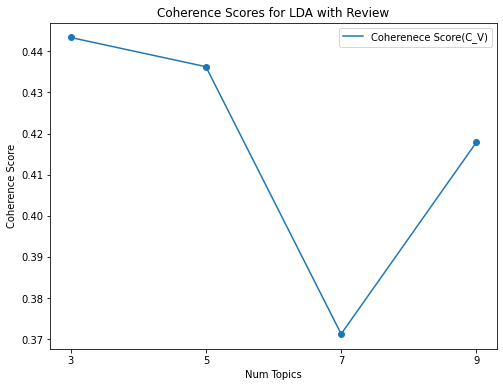

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline



coherence_list = coherence_scores
label = "Coherenece Score(C_V)"

x = range(start, end, step)
plt.figure(figsize=(8, 6))
plt.xticks(x)
plt.plot(x, coherence_list, label=label)
plt.scatter(x, coherence_list)
plt.title("Coherence Scores for LDA with Review")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(loc='best')
plt.show()

In [27]:
selected_model = model_list[np.argmax(coherence_list)]
selected_model.num_topics

3

In [28]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim_models

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim_models.prepare(selected_model, corpus, dictionary)
data

# LDAvis 는 토픽에서 단어가 발생할 확률 벡터인 
# P(w|t)  에 Principal Component Analysis (PCA) 를 적용하여 2 차원의 벡터로 압축

# 각 토픽에서 단어가 발생할 확률 P(w|t)
# 단어의 기본 발생 확률로 정규화한 P(w|t)/P(w)가 λ에 의하여 조합되어 계산
# 사용자는 λ 를 조절하며 각 토픽에 주로 등장하는 단어와, 다른 단어와 차별성이 높은 단어들을 살펴볼 수 있습니다.

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.220316  0.244395       1        1  44.569795
2     -0.120667 -0.297148       2        1  39.987843
0      0.340984  0.052754       3        1  15.442362, topic_info=    Term         Freq        Total Category  logprob  loglift
74    너무  5398.000000  5398.000000  Default  30.0000  30.0000
0     가격  3978.000000  3978.000000  Default  29.0000  29.0000
22    배송  3945.000000  3945.000000  Default  28.0000  28.0000
143  좋\n  3353.000000  3353.000000  Default  27.0000  27.0000
42    유리  2658.000000  2658.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
174   침대  1059.682271  2727.453019   Topic3  -3.2053   0.9227
203   추천   145.339968   170.486176   Topic3  -5.1919   1.7085
373   이거   174.235112   249.302222   Topic3  -5.0106   1.5098
111   사진   245.015757   628.485192   Topic3  -4.6697   0.9261
39    오늘   147.612819   196.468412   Topic3  -5.1764   1.5821

[145 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.999707    가격
193       3  0.990497   가습기
166       1  0.999243   같\n
154       2  0.996877    걱정
155       3  0.997073    고민
...     ...       ...   ...
195       2  0.999344    혼자
57        3  0.997918   화이트
59        3  0.992420    흰색
82        2  0.999625    힘들
290       2  0.997807  힘들\n

[137 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])